# Project: CatVsNon-cat;
## Logistic regression classifier to recoginize cat
In this project I have implemented single layer neural network from scratch to idenity cat.

In [1]:
# importing necessary libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_dataset():
    """
    This function will return dataset required for train and test binary classifer model
    
    Argument:
        Null
    Returns:
        train_set_x_orig --- matrix X for training model
        train_set_y_orig --- vector Y for actual result for traning dataset
        test_set_x_orig  --- matrix X for test model
        test_set_y_orig  --- vector y with actual result for test_set_x 
        classes          --- label for class
    """
    
    # fetching train and test dataset info np array 
    train_data_set = h5py.File('datasets/catvnoncat/train_catvnoncat.h5', 'r')
    train_set_x_orig = np.array(train_data_set['train_set_x'][:])
    train_set_y_orig = np.array(train_data_set['train_set_y'][:])
    
    test_data_set = h5py.File('datasets/catvnoncat/test_catvnoncat.h5', 'r')
    test_set_x_orig = np.array(test_data_set['test_set_x'][:])
    test_set_y_orig = np.array(test_data_set['test_set_y'][:])
    classes = np.array(test_data_set["list_classes"][:])
    
    plt.imshow(train_set_x_orig[25])
    
    # pre-processing of data
    test_set_x = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T / 255
    train_set_x = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T / 255
    train_set_y = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
        
    return train_set_x, train_set_y, test_set_x, test_set_y, classes


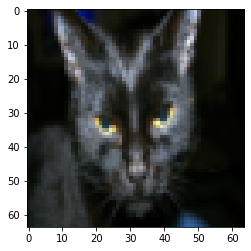

In [3]:
train_set_x, train_set_y, test_set_x, test_set_y, classes = load_dataset()

In [4]:
test_set_x.shape, train_set_x.shape, test_set_y.shape, train_set_y.shape

((12288, 50), (12288, 209), (1, 50), (1, 209))

In [5]:
m = train_set_x.shape[1]
n_0 = train_set_x.shape[0]
n_1 = 1

In [6]:
n_0, m

(12288, 209)

In [34]:
def initialize_parameter():
    w = np.zeros((1, 12288))
    b = 0
    return w,b

In [35]:
def sigmoid (Z):
    s = 1 / (1 + np.exp(-Z))
    return s

In [36]:
def sigmoid_dash (sigmoid):
    return sigmoid(1 - sigmoid)

In [37]:
w, b = initialize_parameter()

In [38]:
w

array([[0., 0., 0., ..., 0., 0., 0.]])

In [39]:
w.shape

(1, 12288)

In [40]:
def propagation (X, Y, w, b, m):
    
    # forward propagation
    Z = np.dot(w, X) + b
    A = sigmoid(Z)
    # finding cost function
    cost =  -1 / m * (np.sum( Y * np.log(A) + (1 - Y) * np.log(1 - A)))
    
    # backward propagation
    dZ = A - Y
    dw = 1/m * (dZ @ X.T)
    db = 1/m * (np.sum(dZ))
     
    grad = {
        'dw': dw,
        'db': db
    }
    
    return grad, cost

In [41]:
def train_model (X, Y, iteration, alpha):
    w, b = initialize_parameter()
    costs = []
    for i in range(1, iteration):
        grad, cost = propagation(X, Y, w, b, m)
        dw = grad['dw']
        db =grad['db']
        
        w = w - alpha * dw
        b = b - alpha * db
        
        costs.append(cost)
        if i % 100 == 0:
            print("Cost at iteratin " + str(i) + "= " + str(cost))
                  
    return (w,b, costs)

In [56]:
w,b, costs = train_model(train_set_x, train_set_y, 10000, 0.009)

Cost at iteratin 100= 0.477156599120851
Cost at iteratin 200= 0.8471090844796878
Cost at iteratin 300= 0.5837524292707903
Cost at iteratin 400= 0.48113378858142664
Cost at iteratin 500= 0.361210669797696
Cost at iteratin 600= 0.24121803137399878
Cost at iteratin 700= 0.16856909798571454
Cost at iteratin 800= 0.15051961109129258
Cost at iteratin 900= 0.13960214927293094
Cost at iteratin 1000= 0.13039816628969828
Cost at iteratin 1100= 0.12239501125295052
Cost at iteratin 1200= 0.11532321913851916
Cost at iteratin 1300= 0.10901077032638219
Cost at iteratin 1400= 0.10333458689620555
Cost at iteratin 1500= 0.09820058698730896
Cost at iteratin 1600= 0.09353397977935106
Cost at iteratin 1700= 0.08927382995795337
Cost at iteratin 1800= 0.08536965871234038
Cost at iteratin 1900= 0.08177913909839762
Cost at iteratin 2000= 0.0784664419650968
Cost at iteratin 2100= 0.07540100103018835
Cost at iteratin 2200= 0.07255656495844441
Cost at iteratin 2300= 0.06991045494365192
Cost at iteratin 2400= 0.06

In [43]:
w

array([[ 0.01084253, -0.02821444, -0.01276612, ..., -0.01310739,
        -0.03209621,  0.02422386]])

In [44]:
b

-0.0061346587223721286

In [45]:
def predict (w,b, X):
    m = X.shape[1]
    A = sigmoid(w @ X + b)
    Y = np.zeros_like(A)
    
    for i in range(A.shape[1]):
        Y[0][i] = 1 if A[0][i] > 0.5 else 0
        
    return Y

In [46]:
Y_hat = predict(w, b, test_set_x)

In [47]:
Y = test_set_y

In [48]:
test_set_y.shape

(1, 50)

In [49]:
success = 0
failure = 0

In [50]:
for i in range(Y.shape[1]):
    if Y_hat[0][1] == Y_hat[0][1]:
        success += 1
    else:
        failure += 1

In [51]:
success

50

In [52]:
failure

0

In [53]:
success_rate = str((success/ (success + failure)) * 100) + ' %' 

In [54]:
success_rate

'100.0 %'

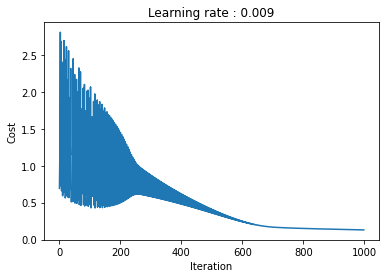

In [55]:
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.title('Learning rate : ' + str(0.009))
plt.show()